In [1]:
import import_ipynb
from functions import *
from gradient import *

importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from gradient.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.pardir)

import import_ipynb
from dataset.mnist import load_mnist


importing Jupyter notebook from ..\dataset\mnist.ipynb


In [5]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        """
            weight는 랜덤으로, bias는 0으로 초기화한다.
        """

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def net_numerical_gradient(self, x, t):
  
        
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)


        return grads

In [165]:

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.78275, 0.7864
train acc, test acc | 0.8771833333333333, 0.8811
train acc, test acc | 0.89695, 0.9008


KeyboardInterrupt: 

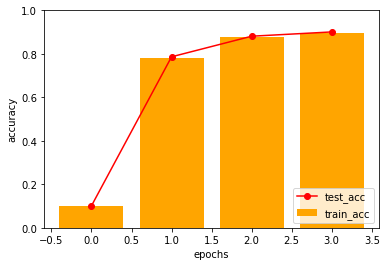

In [166]:
# 그래프 그리기

x = np.arange(len(train_acc_list))

# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.bar(x, train_acc_list, label="train_acc", color="orange")
plt.plot(x, test_acc_list, label='test_acc',color="red",  marker='o')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [178]:
def make_sample_data_set():
    
    """
        x는 0~999 정수이다.
        정답은 x를 100으로 나눴을 때의 몫이다.
    """
    
    x = np.random.randint(999, size=(100,1))

    t_data = x.flatten() // 100
    
    # t_data 원핫 인코딩 코드
    num = np.unique(t_data, axis=0)
    num = num.shape[0]
    t = np.eye(num)[t_data] 
    
    return x,t

(x_train, t_train), (x_test, t_test) = make_data_set(), make_data_set()


INPUT_SIZE = 1
HIDDEN_SIZE = 30
OUTPUT_SIZE = 10

In [179]:
# 데이터 읽기

x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

network = TwoLayerNet(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE)

# 하이퍼파라미터
iters_num = 60000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 300   # 미니배치 크기
learning_rate = 0.04

train_loss_list = []
train_acc_list = []
test_acc_list = []



# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

print(iter_per_epoch)

for i in range(iters_num):

    
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    


    
    # 기울기 계산
#     grad = network.net_numerical_gradient(x_batch, t_batch) # - 수치 미분법
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

#     if i % (iter_per_epoch) * 5 == 0:

    if i % 5000 == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        
        
print("===============")
print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        
print("done")


50.0
train acc, test acc | 0.09333333333333334, 0.08766666666666667
train acc, test acc | 0.31093333333333334, 0.30533333333333335
train acc, test acc | 0.31106666666666666, 0.30593333333333333
train acc, test acc | 0.26033333333333336, 0.25693333333333335
train acc, test acc | 0.4884, 0.4891333333333333
train acc, test acc | 0.271, 0.2673333333333333
train acc, test acc | 0.3212, 0.3164
train acc, test acc | 0.6954666666666667, 0.6938
train acc, test acc | 0.6312, 0.6252
train acc, test acc | 0.416, 0.4056666666666667
train acc, test acc | 0.5805333333333333, 0.5785333333333333
train acc, test acc | 0.5988666666666667, 0.6001333333333333
train acc, test acc | 0.5988666666666667, 0.6001333333333333
done


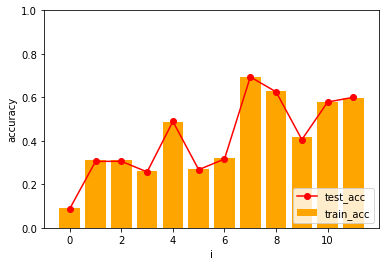

In [180]:
# 그래프 그리기

x = np.arange(len(train_acc_list))

# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.bar(x, train_acc_list, label="train_acc", color="orange")
plt.plot(x, test_acc_list, label='test_acc',color="red",  marker='o')
plt.xlabel("i")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
